In [58]:
%load_ext autoreload
%autoreload 2
from GameFlow import Board, BoardTerminalTest, FenceChecker, MoveChecker
from Search import MinimaxSearch, AlphaBetaSearch, DLMinimaxSearch, DLAlphaBetaSearch
from Heuristics import DistanceHeuristic
import sys
sys.setrecursionlimit(10000)
from copy import deepcopy
from math import inf

grid_size = 5
fence_length = 2

fence_checker = FenceChecker(
    grid_size = grid_size,
    fence_length = fence_length
)
move_checker = MoveChecker(grid_size)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
board = Board(
    grid_size = grid_size,
    fence_checker = fence_checker,
    player_positions = None,
    move_checker = move_checker,
    fences_horizontal=set(),
    fences_vertical=set()
)
terminal_test = BoardTerminalTest()
heuristic = DistanceHeuristic()

In [60]:
state_gen_count = []
depths = range(3, 9)
for depth in depths:

    search = DLMinimaxSearch(
        depth = depth,
        heuristic = heuristic
    )

    strategy = search.find_strategy(board, terminal_test)
    state_gen_count.append(len(strategy))
    print(depth)

3
4
5
6
7
8


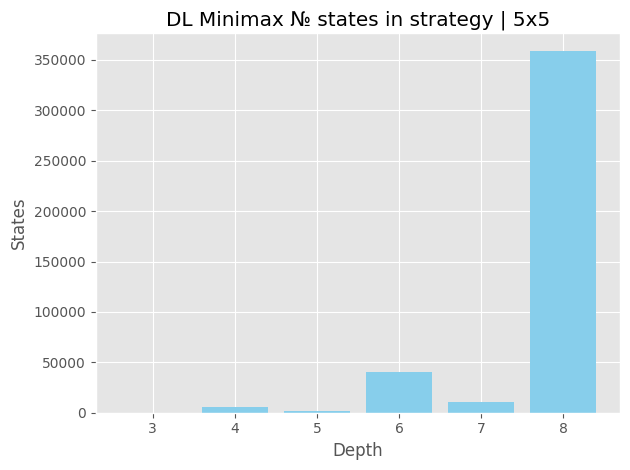

In [61]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.bar(depths, state_gen_count, color = 'skyblue')

# Adding title and labels (optional)

plt.title("DL Minimax № states in strategy | 5x5")
plt.xticks(depths)
plt.xlabel("Depth")
plt.ylabel("States")
plt.tight_layout()
plt.savefig("5x5_gen_states_minimax.png", dpi = 800)

plt.show()